In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

img1 = cv2.imread(os.path.join(os.getcwd(), 'foto1.jpeg'))
img2 = cv2.imread(os.path.join(os.getcwd(), 'foto2.jpeg'))

img1_gray = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

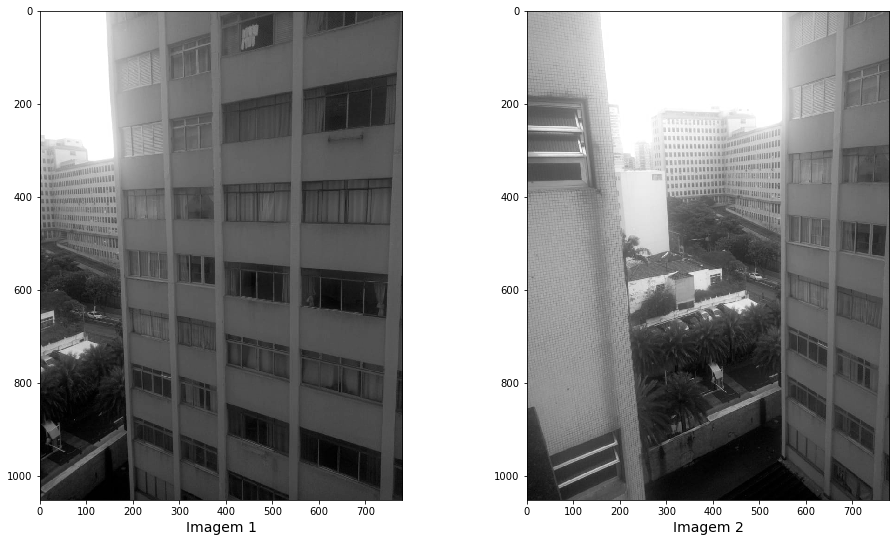

In [2]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,9))
ax1.imshow(img1_gray, cmap='gray')
ax1.set_xlabel("Imagem 1", fontsize=14)

ax2.imshow(img2_gray, cmap='gray')
ax2.set_xlabel("Imagem 2", fontsize=14)
plt.show()

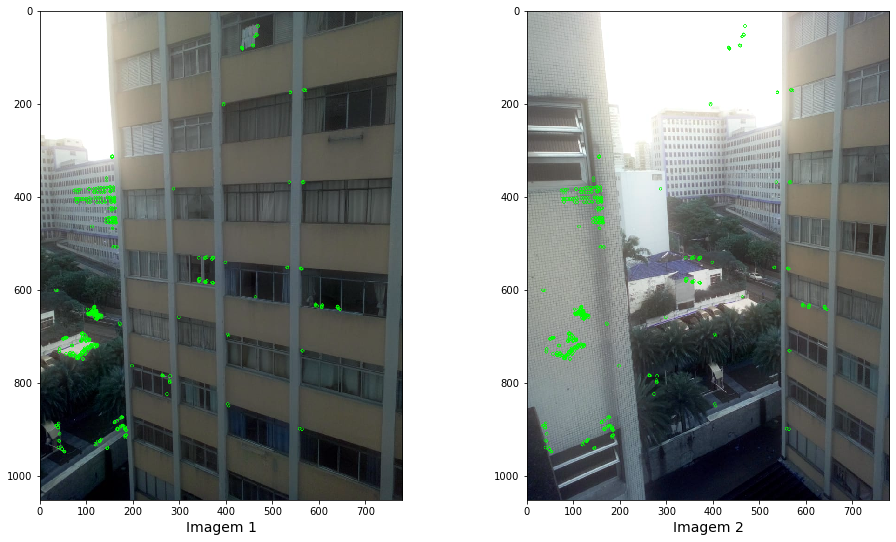

In [3]:
detect = cv2.ORB_create()

kp1, feat1 = detect.detectAndCompute(img1_gray, None)
kp2, feat2 = detect.detectAndCompute(img2_gray, None)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16,9))
ax1.imshow(cv2.drawKeypoints(img1, kp1, None, color=(0,255,0)))
ax1.set_xlabel("Imagem 1", fontsize=14)

ax2.imshow(cv2.drawKeypoints(img2, kp1, None, color=(0,255,0)))
ax2.set_xlabel("Imagem 2", fontsize=14)
plt.show()

Matches: 151


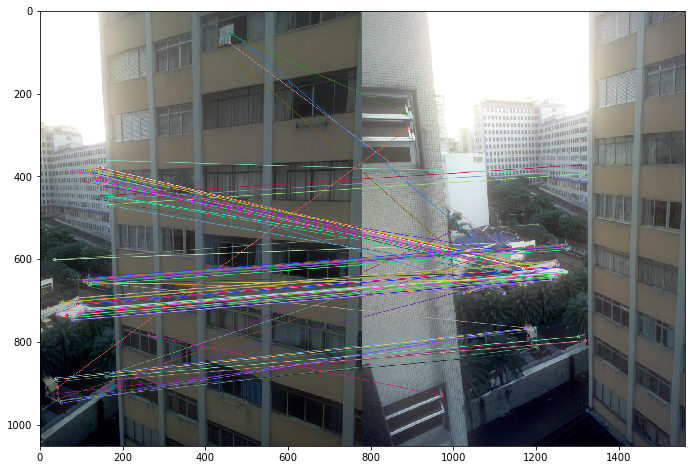

In [4]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
best_matches = bf.match(feat1, feat2) 

raw_matches = sorted(best_matches, key=lambda x: x.distance)
print('Matches:', len(raw_matches))

fig = plt.figure(figsize=(20,8))

img3 = cv2.drawMatches(img1, kp1, img2, kp2, best_matches[:100], None, flags = cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.imshow(img3)
plt.show()

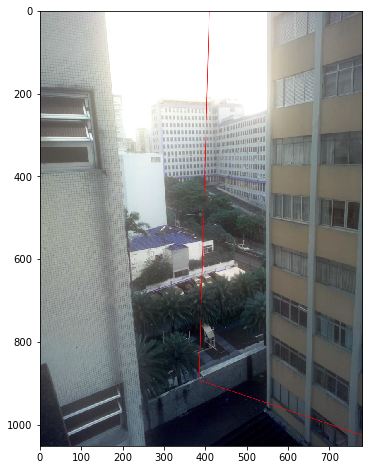

In [7]:
src_pts = np.float32([kp1[m.queryIdx].pt for m in raw_matches]).reshape(-1,1,2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in raw_matches]).reshape(-1,1,2)

H, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)

h,w = img1_gray.shape
pts = np.float32([ [0,0],[0,h-1], [w-1, h-1], [w-1, 0]]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts, H)

img_final = cv2.polylines(img2, [np.int32(dst)], True, 255,1, cv2.LINE_AA)

fig = plt.figure(figsize=(20,8))
plt.imshow(img_final)
plt.show()